In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt


## Описание задания
Постройте пять графиков по выбранным данным.
Графики должны быть различных видов и использовать хотя бы две из рассмотренных на занятии библиотек.
Опишите для каждого графика:
какого типа переменные участвуют в визуализации;
какова её цель (например: посмотреть на корреляцию двух величин или на распределение значений);
почему выбрали именно такой тип графика.


In [2]:
#загрузка файла с данными: tmdb_5000_movies.csv
df = pd.read_csv(r'D:\ASK\ranepa\python\визуализация и статистика\archive\tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0, 0.5, 'Revenue')

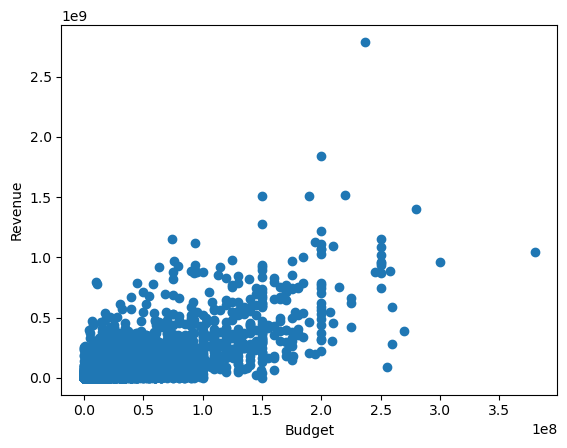

In [3]:
# revenue vs budget в scatter plot - посмотрим на зависимость в общем
plt.scatter(df.budget, df.revenue)
plt.xlabel("Budget")
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue/Budget mln.usd')

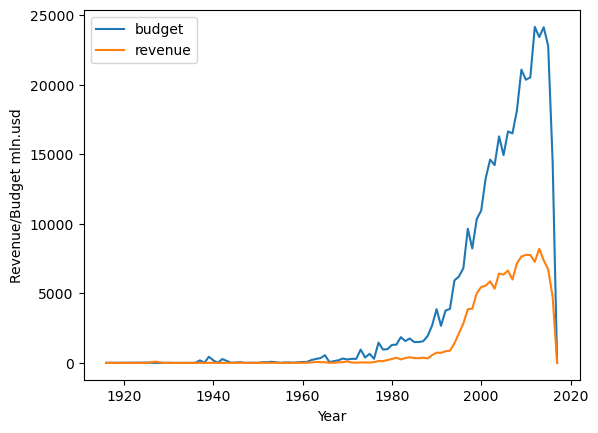

In [4]:
# преобразование release_date в формат даты и формирование нового dataframe с группировкой по году
df['release_date'] = df['release_date'].astype("datetime64[ns]")
df['year']=pd.DatetimeIndex(df['release_date']).year
dynamic_by_year=df[['budget', 'revenue', 'year']].groupby('year').sum()
dynamic_by_year.head()
# рисуем линейную диаграмму с динамикой суммарных бюджетов и прибыли
plt.plot(dynamic_by_year.index, dynamic_by_year.revenue/1000000)
plt.plot(dynamic_by_year.index, dynamic_by_year.budget/1000000)
plt.legend(dynamic_by_year)
plt.xlabel("Year")
plt.ylabel('Revenue/Budget mln.usd')


### Видим, что затраты на производство и объем прибыли быстро растут с 70-х годов. При этом общий объем прибыли существенно ниже бюджета, что говорит о том, что большое количество фильмов не окупаются. На следующем графике посмотрим распределение фильмов по метрике окупаемость равной отношению revenue к budget.

In [5]:
# сделаем столбец с параметром BRR - budget revenue ratio = (revenue/budget) в основном датафрейме. Если это значение больше единицы -фильм окупился
df['BRR']=df['revenue']/df['budget']

(array([127.,  94., 115., 100., 119., 103.,  88.,  85.,  91.,  91.,  95.,
         76.,  65.,  81.,  56.,  60.,  49.,  61.,  45.,  35.,  32.,  51.,
         25.,  24.,  24.,  25.,  23.,  15.,  18.,  15.,  16.,  11.,  14.,
         11.,  18.,  10.,   9.,  10.,   6.,   9.,   8.,   7.,   6.,   1.,
          8.,   3.,   8.,   4.,   4.,   7.,   6.,   2.,   3.,   4.,   2.,
          4.,   2.,   1.,   2.,   7.,   1.,   0.,   0.,   1.,   3.,   0.,
          2.,   2.,   2.,   0.,   1.,   3.,   0.,   1.,   1.,   1.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.,   3.,   3.,   1.,   0.,   3.,
          0.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,
          2.]),
 array([5.21739130e-07, 1.98524712e-01, 3.97048901e-01, 5.95573091e-01,
        7.94097281e-01, 9.92621471e-01, 1.19114566e+00, 1.38966985e+00,
        1.58819404e+00, 1.78671823e+00, 1.98524242e+00, 2.18376661e+00,
        2.38229080e+00, 2.58081499e+00, 2.77933918e+00, 2.97786337e+00,
        3.17638756e+00, 3.3749

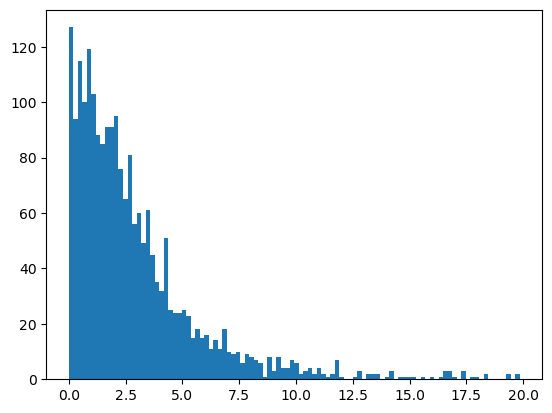

In [15]:
# построим гистограмму с распределением по BRR, после 2000 года
plt.hist(df.BRR[(df.BRR<20) & (df.revenue>0) & (df.year>2000)], bins=100)
plt.xlabel("BRR")
plt.ylabel('количество фильмов')

Text(0, 0.5, 'количество фильмов')

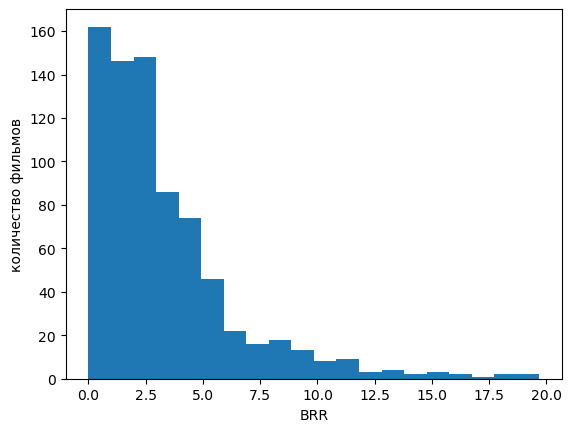

In [21]:
# построим гистограмму с распределением по BRR, за период 2010 - 2020 года, с меньшим количеством интервалов
plt.hist(df.BRR[(df.BRR<20) & (df.revenue>0) & (df.year>2010)], bins=20)
plt.xlabel("BRR")
plt.ylabel('количество фильмов')

In [42]:
import seaborn as sns
import ast


Text(0.5, 1.0, 'Распределение средних оценок после 2010 года')

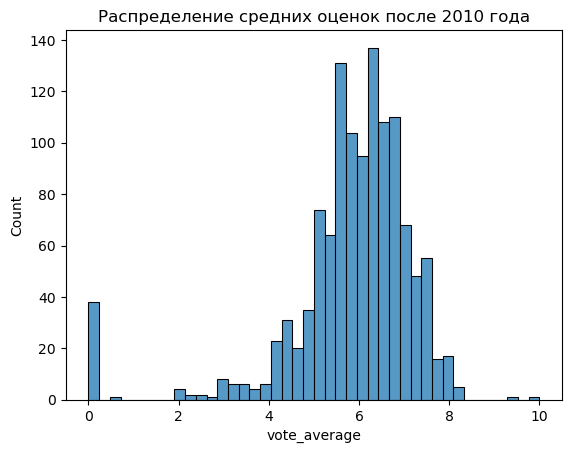

In [23]:
sns.histplot(df['vote_average'][df.year>2010])
plt.title('Распределение средних оценок после 2010 года')

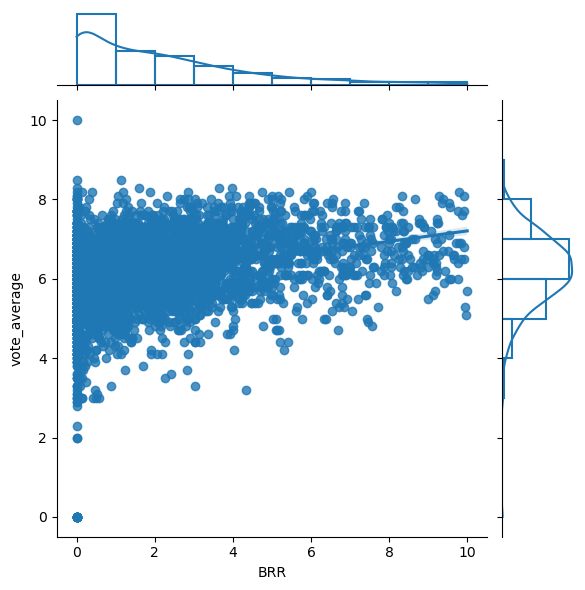

In [53]:
# Как зависит BRR от vote_average
df_filtered = df[df['BRR']<10]
sns.jointplot(x='BRR', y='vote_average', data=df_filtered, kind='reg', marginal_kws=dict(bins=10, fill=False))


In [55]:
### Видна положительная зависимость между оценкой и возвратом на бюджет